# Experiment Ten

## Analysis

In [1]:
%load_ext pycodestyle_magic

In [41]:
# Analytical Tools
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# General Utilities
import json
import pprint
import random

# Custom Utilities
import utilities.processing as processing
import utilities.plotting as plotting
import utilities.describe as describe

# Some settings
log = pprint.pprint
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Reading Data and Defining Constants

In [3]:
FILE_NAMES = [
    'raw-data/survey-ten-responses.json',
]

CONDITIONS = ['Quiz', 'Upvotes']
QUESTIONS = ['Curiosity']

NUM_JUDGEMENTS = 1
NUMBER_OF_GROUPS = 2
GROUP_SIZE = 2
ALL_LABELS = processing.get_article_labels(NUMBER_OF_GROUPS, GROUP_SIZE)
JUDGMENT_LABELS = processing.get_judgment_labels(NUM_JUDGEMENTS)

OTHER_LABELS = ALL_LABELS[:GROUP_SIZE]
SCIENCE_LABELS = ALL_LABELS[GROUP_SIZE:]

In [4]:
quiz_responses = pd.read_pickle('raw-data/quiz-responses.pkl')
upvote_responses = pd.read_pickle('raw-data/upvote-responses.pkl')

upvote_responses.head()

,condition_number,consent,g0_i0_j0,g0_i0_number,g0_i0_time,g0_i1_j0,g0_i1_number,g0_i1_time,g1_i0_j0,g1_i0_number,g1_i0_time,g1_i1_j0,g1_i1_number,g1_i1_time,high_group,participant_id,quiz_one,quiz_two,response_type
34,1,1.0,5.0,5.0,24386.0,3.0,6.0,4942.0,1.0,9112.0,25309.0,1.0,9565.0,4691.0,1,bavwt1kyppsqpl0rkuo3lv8hvsemoz11,1.0,1.0,0
47,1,1.0,0.0,6.0,15338.0,0.0,6.0,25815.0,2.0,8921.0,6153.0,4.0,8716.0,42526.0,1,ugj5bagsh00kpjltkk49g0r1ksagk910,1.0,1.0,0
50,1,1.0,5.0,6.0,36101.0,2.0,4.0,29804.0,1.0,8803.0,36141.0,3.0,9351.0,19342.0,1,73vbagummagw9qga2jhx4nx9k86o2jaz,1.0,1.0,0
53,1,1.0,1.0,5.0,2948.0,4.0,4.0,12791.0,4.0,10012.0,19606.0,5.0,8525.0,38386.0,1,ne4b0fgkk9l0pylv46j880p926rzl8f0,1.0,1.0,0
56,1,1.0,3.0,6.0,1421.0,5.0,5.0,169304.0,6.0,9341.0,3976.0,4.0,8783.0,4147.0,1,5d9tvwzgkygn919vwu5lepod88fw31ua,1.0,1.0,0


### Curiosity Analysis

In [13]:
# Compute mean ratings for each groups in both conditions
for data in (quiz_responses, upvote_responses):
    for j_label in JUDGMENT_LABELS:
        other_headers = ['{}_{}'.format(q_label, j_label) for q_label in OTHER_LABELS]
        science_headers = ['{}_{}'.format(q_label, j_label) for q_label in SCIENCE_LABELS]
        other_data = data[other_headers].mean(axis=1)
        science_data = data[science_headers].mean(axis=1)
        
        data['{}_other'.format(j_label)] = other_data
        data['{}_science'.format(j_label)] = science_data
        data['{}_diff'.format(j_label)] = science_data - other_data

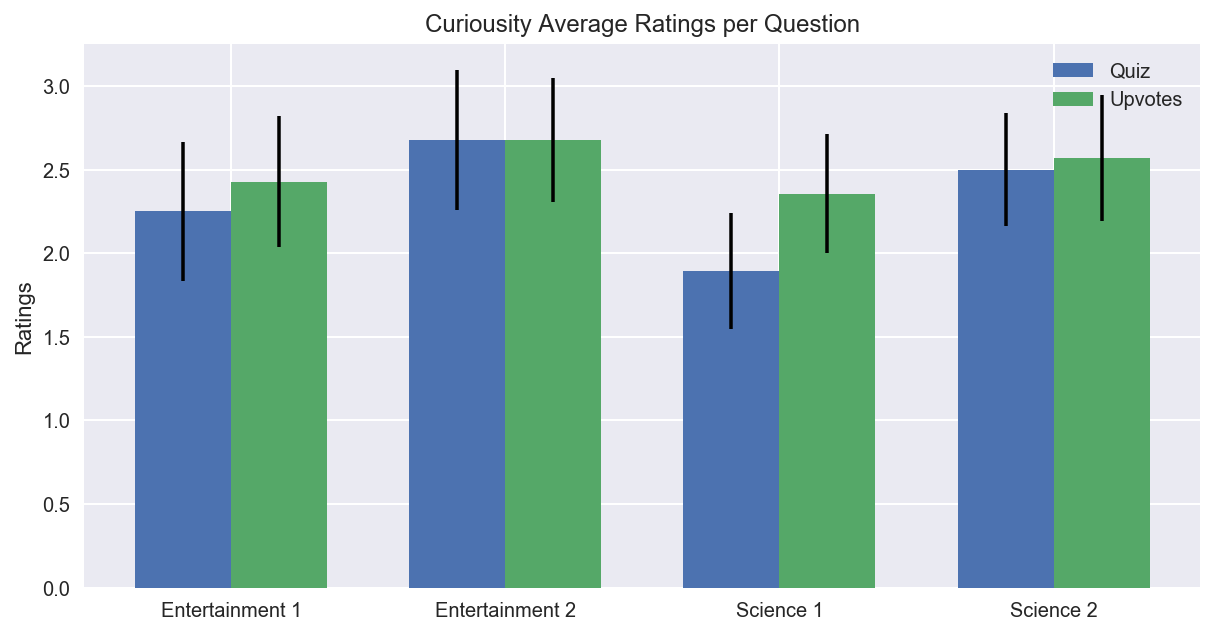

In [38]:
PLOTTING_OPTIONS = {
    'title': 'Curiousity Average Ratings per Question',
    'ylabel': 'Ratings',
    'ticks': ['Entertainment 1', 'Entertainment 2', 'Science 1', 'Science 2'],
    'legend': ['Quiz', 'Upvotes'],
    'size': (10, 5)
}

CURIOSITY_LABEL = JUDGMENT_LABELS[0]
quiz_means, quiz_errs = [], []
for label in ALL_LABELS:
    data = quiz_responses['{}_{}'.format(label, CURIOSITY_LABEL)]
    quiz_means.append(data.mean())
    quiz_errs.append(stats.sem(data))

upvote_means, upvote_errs = [], []
for label in ALL_LABELS:
    data = upvote_responses['{}_{}'.format(label, CURIOSITY_LABEL)]
    upvote_means.append(data.mean())
    upvote_errs.append(stats.sem(data))
    
plotting.plot_double_bar(
    quiz_means, quiz_errs,
    upvote_means, upvote_errs,
    **PLOTTING_OPTIONS)

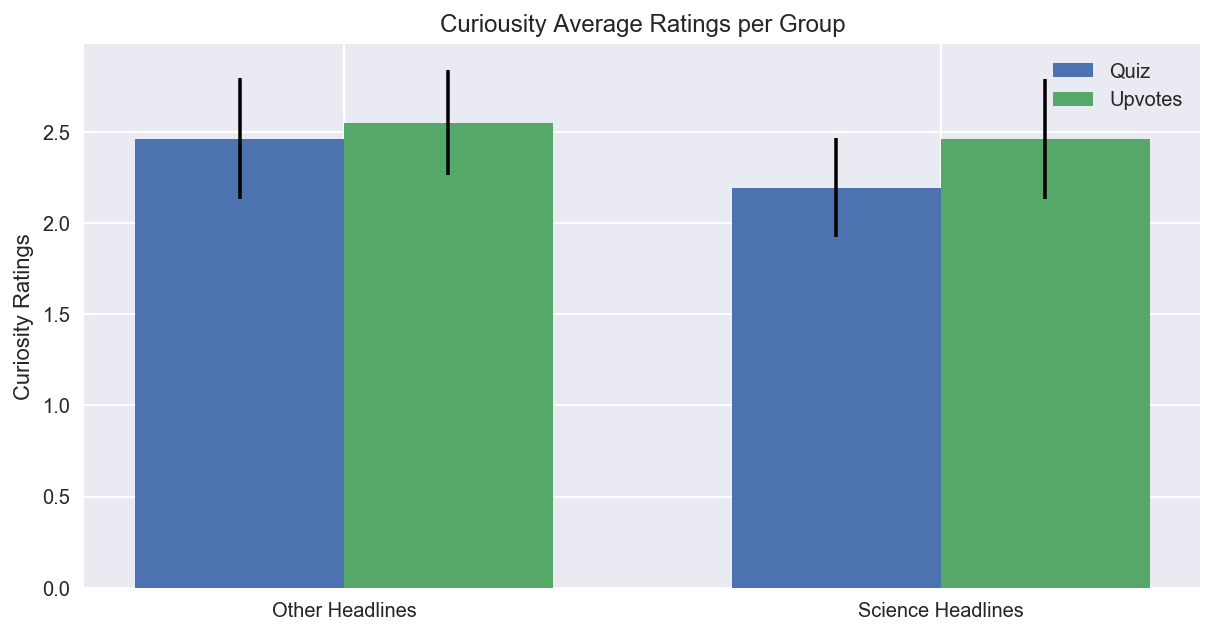

In [24]:
PLOTTING_OPTIONS = {
    'title': 'Curiousity Average Ratings per Group',
    'ylabel': 'Curiosity Ratings',
    'ticks': ['Entertainment Headlines', 'Science Headlines'],
    'legend': ['Quiz', 'Upvotes'],
    'size': (10, 5)
}

CURIOSITY_LABEL = JUDGMENT_LABELS[0]
other_data = quiz_responses['{}_other'.format(CURIOSITY_LABEL)]
science_data = quiz_responses['{}_science'.format(CURIOSITY_LABEL)]
quiz_means = [other_data.mean(), science_data.mean()] 
quiz_errs = [stats.sem(other_data), stats.sem(science_data)]

other_data = upvote_responses['{}_other'.format(CURIOSITY_LABEL)]
science_data = upvote_responses['{}_science'.format(CURIOSITY_LABEL)]
upvote_means = [other_data.mean(), science_data.mean()] 
upvote_errs = [stats.sem(other_data), stats.sem(science_data)]

plotting.plot_double_bar(
    quiz_means, quiz_errs,
    upvote_means, upvote_errs,
    **PLOTTING_OPTIONS)

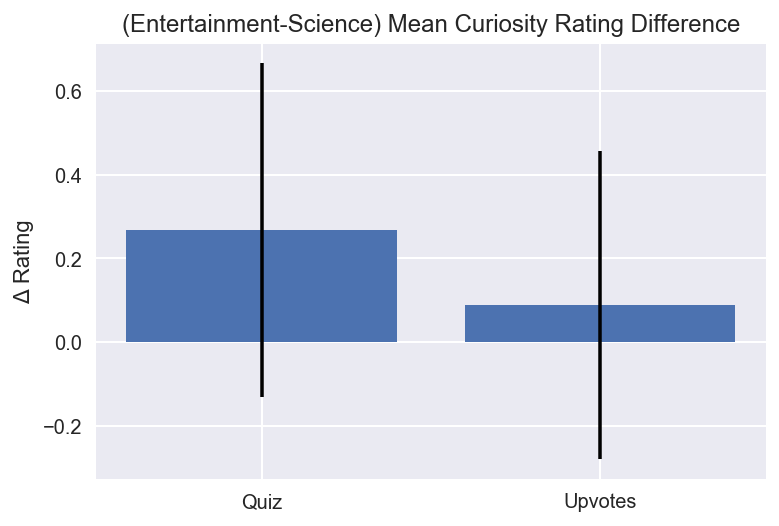

In [37]:
PLOTTING_OPTIONS = {
    'ylabel': 'Δ Rating',
    'ticks': ['Quiz', 'Upvotes'],
    'title': '(Entertainment-Science) Mean Curiosity Rating Difference',
}


CURIOSITY_LABEL = JUDGMENT_LABELS[0]
quiz_data = quiz_responses['{}_diff'.format(CURIOSITY_LABEL)]
upvote_data = upvote_responses['{}_diff'.format(CURIOSITY_LABEL)]

plotting.plot_single_bar(
    [-quiz_data.mean(), -upvote_data.mean()],
    [stats.sem(quiz_data), stats.sem(upvote_data)],
    **PLOTTING_OPTIONS
)

In [36]:
print('Quiz & Post Upvotes')
for question, j_label in zip(QUESTIONS, JUDGMENT_LABELS):
    print('{}: {}'.format(question, describe.independent_t_test(
        quiz_responses['{}_diff'.format(j_label)],
        upvote_responses['{}_diff'.format(j_label)])))

Quiz & Post Upvotes
Curiosity: t = -0.329, p = 0.743 (1 greater)


### Time Analysis

In [9]:
for data in (quiz_responses, upvote_responses):
    other_headers = ['{}_time'.format(q_label) for q_label in OTHER_LABELS]
    science_headers = ['{}_time'.format(q_label) for q_label in SCIENCE_LABELS]
    other_data = data[other_headers].mean(axis=1)
    science_data = data[science_headers].mean(axis=1)
    data['time_diff'] = science_data - other_data

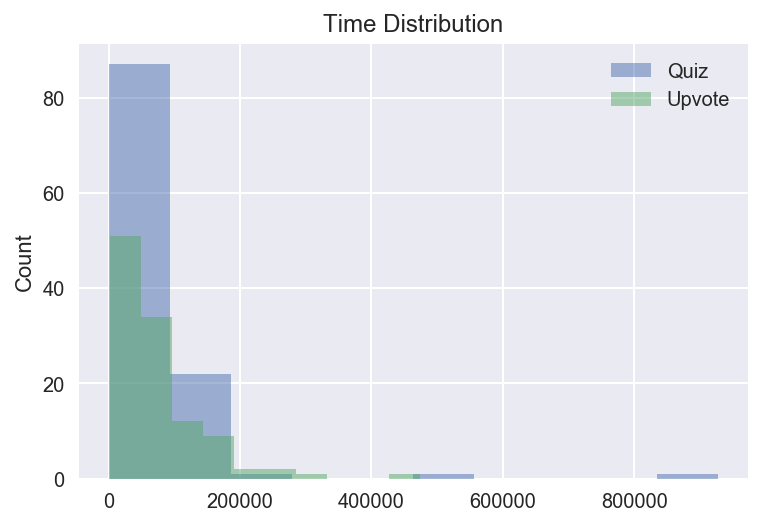

In [42]:
PLOTTING_OPTIONS = {
    'title': 'Entire Time Distribution',
    'ylabel': 'Count',
    'legend': ['Quiz', 'Upvote']
}

for data in (quiz_responses, upvote_responses):
    all_time_headers = ['{}_time'.format(label) for label in ALL_LABELS]
    all_time_data = data[all_time_headers]
    plt.hist(all_time_data.values.flatten(), alpha=0.5)

plotting.label_graph(**PLOTTING_OPTIONS)
plt.show()

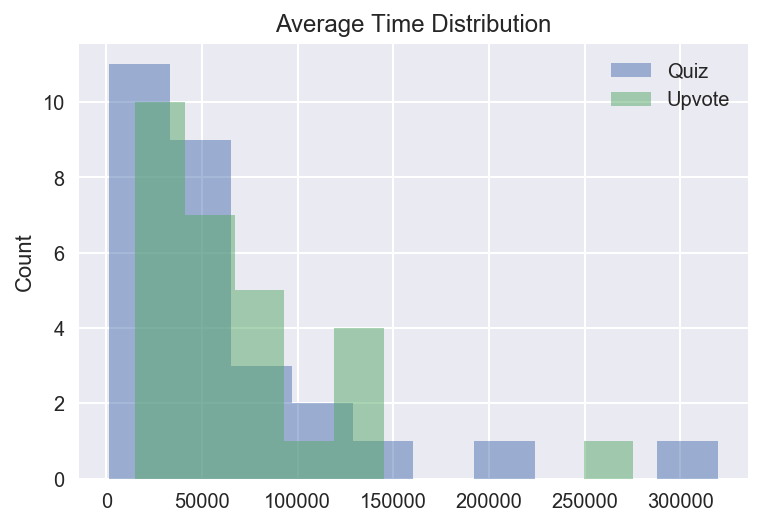

In [47]:
PLOTTING_OPTIONS = {
    'title': 'Average Time Distribution',
    'ylabel': 'Count',
    'legend': ['Quiz', 'Upvote']
}

for data in (quiz_responses, upvote_responses):
    all_time_headers = ['{}_time'.format(label) for label in ALL_LABELS]
    all_time_data = data[all_time_headers].mean(axis=1)
    data['mean_time'] = all_time_data
    plt.hist(all_time_data, alpha=0.5)

plotting.label_graph(**PLOTTING_OPTIONS)
plt.show()

In [62]:
THRESHOLD = 3
quiz_bound = (quiz_responses.mean_time.mean() 
    + THRESHOLD * quiz_responses.mean_time.std())
upvote_bound = (upvote_responses.mean_time.mean() 
    + THRESHOLD * upvote_responses.mean_time.std())

quiz_cleaned = quiz_responses[quiz_responses.mean_time <  quiz_bound]
upvote_cleaned = upvote_responses[upvote_responses.mean_time <  upvote_bound]
print(len(quiz_responses) - len(quiz_cleaned))
print(len(upvote_responses) - len(upvote_cleaned))

1
1


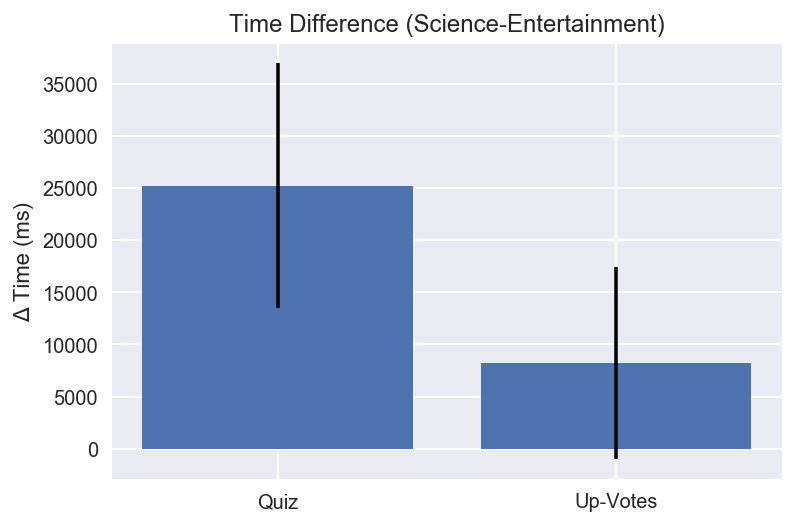

In [84]:
PLOTTING_OPTIONS = {
    'ylabel': 'Δ Time (ms)',
    'ticks': ['Quiz', 'Up-Votes'],
    'title': 'Time Difference (Science-Entertainment)',
}

plotting.plot_single_bar(
    [quiz_cleaned.time_diff.mean(),
     upvote_cleaned.time_diff.mean()],
    [stats.sem(quiz_cleaned.time_diff),
     stats.sem(upvote_cleaned.time_diff)],
    **PLOTTING_OPTIONS
)

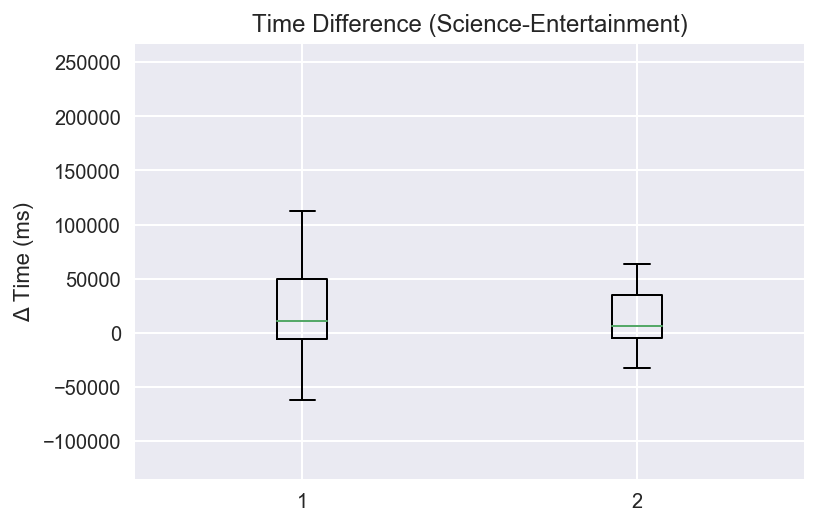

1 Quiz 11286.0
2 Upvotes 6513.5


In [93]:
PLOTTING_OPTIONS = {
    'ylabel': 'Δ Time (ms)',
    'title': 'Time Difference (Science-Entertainment)',
}

boxes = [quiz_cleaned.time_diff, upvote_cleaned.time_diff]
plt.boxplot(boxes)
plt.ylabel(PLOTTING_OPTIONS['ylabel'])
plt.title(PLOTTING_OPTIONS['title'])
plt.show()

print(1, 'Quiz', quiz_cleaned.time_diff.median())
print(2, 'Upvotes', upvote_cleaned.time_diff.median())

In [90]:
print('{}: {}'.format(question, describe.independent_t_test(
        quiz_cleaned.time_diff, upvote_cleaned.time_diff)))

Curiosity: t = 1.14, p = 0.26 (0 greater)
